<a href="https://colab.research.google.com/github/aqsa-isha/Encryptix-Sales-Prediction-Using-Python/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
# Load and read the data
data = pd.read_csv('/content/advertising.csv')

In [15]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [16]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [17]:
# check for null values
data.isnull().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


In [18]:
# Desciption of dataset
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [23]:
# Visualize the relationship between sales and advertising mediums using Plotly Express
figure = px.scatter(data_frame=data, x="TV", y="sales", size="TV", trendline="ols", color="sales", title="TV Advertising vs Sales")
figure.show()


In [26]:
# Scatter plot with trendline for Radio advertising
figure = px.scatter(data_frame=data, x="radio", y="sales", size="radio", trendline="ols", color="sales", title="Radio Advertising vs Sales")
figure.show()


In [27]:
figure = px.scatter(data_frame=data, x="newspaper", y="sales", size="newspaper", trendline="ols", color="sales", title="Newspaper Advertising vs Sales")
figure.show()


In [28]:
correlation = data.corr()
correlation

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


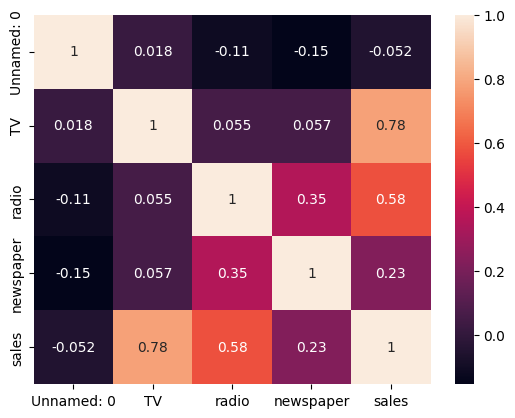

In [29]:
sns.heatmap(correlation, annot=True)
plt.show()

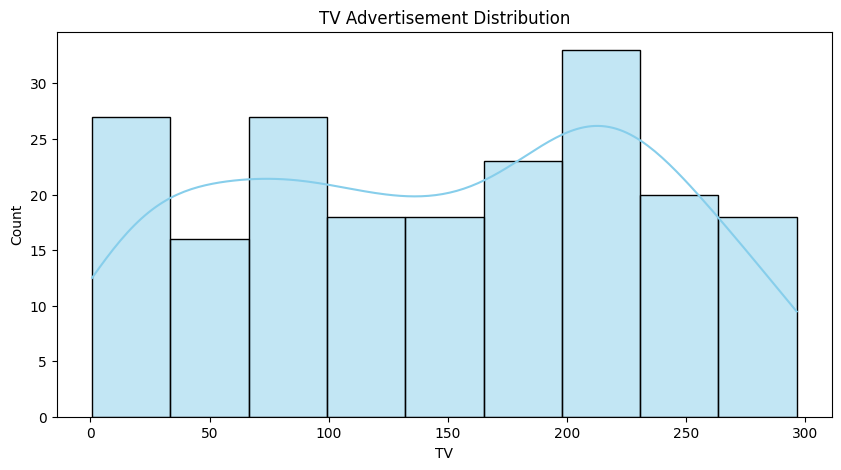

In [30]:
# Histogram Plot of TV Advertisement Distribution
plt.figure(figsize= (10, 5))
sns.histplot(data['TV'], kde = True, color= 'skyblue')
plt.title('TV Advertisement Distribution')
plt.xlabel('TV')
plt.ylabel('Count')
plt.show()

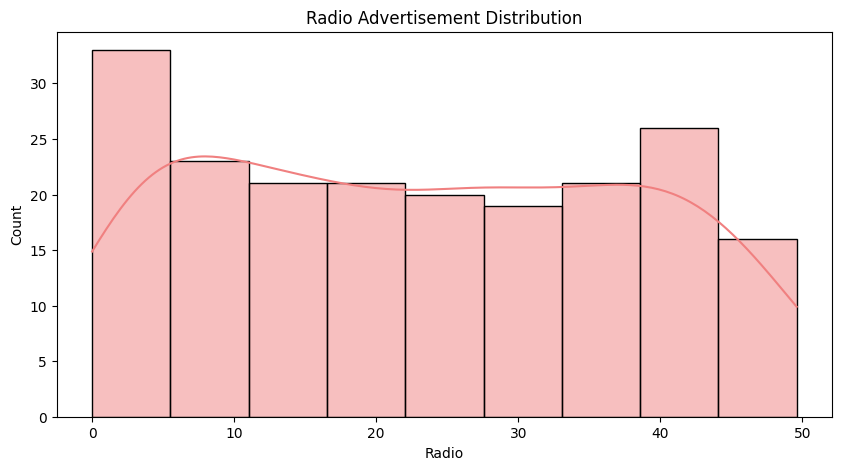

In [32]:
# Histogram Plot of Radio Advertisement Distribution
plt.figure(figsize= (10, 5))
sns.histplot(data['radio'], kde = True, color= 'lightcoral')
plt.title('Radio Advertisement Distribution')
plt.xlabel('Radio')
plt.ylabel('Count')
plt.show()

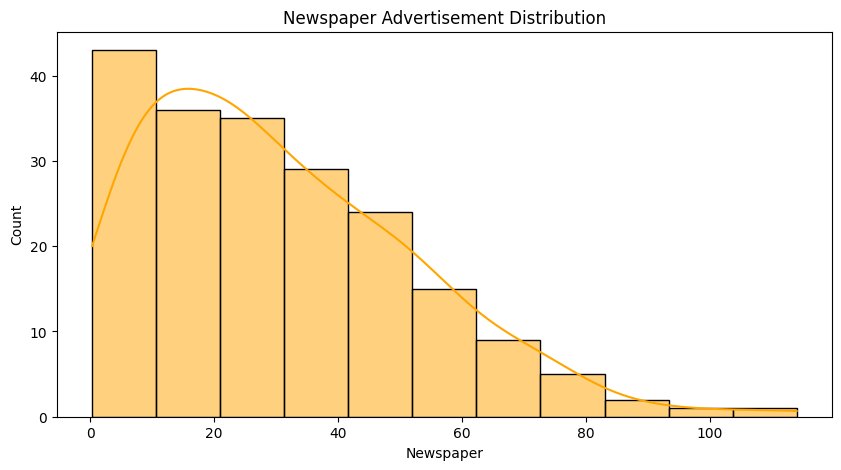

In [34]:
# Histogram Plot of Newpaper Advertisement Distribution
plt.figure(figsize= (10, 5))
sns.histplot(data['newspaper'], kde = True, color= 'orange')
plt.title('Newspaper Advertisement Distribution')
plt.xlabel('Newspaper')
plt.ylabel('Count')
plt.show()

## Feature Engineering


In [37]:
# Features
x = data[['TV', 'radio', 'newspaper']]
# Target variable
y = data['sales']

In [38]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_prediction = linear_model.predict(x_test)

In [41]:
# Evaluate linear Regression Model
linear_mse = mean_squared_error(y_test, linear_prediction)
linear_r2 = r2_score(y_test, linear_prediction)
print("Linear Regression Model:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)

Linear Regression Model:
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


In [42]:
# Train a Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_prediction = rf_model.predict(x_test)


In [43]:
# Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, rf_prediction)
rf_r2 = r2_score(y_test, rf_prediction)
print("\nRandom Forest Model:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)


Random Forest Model:
Mean Squared Error: 0.565459975000002
R-squared: 0.9820850572504912


In [44]:
# Train Gradient Boost Model
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
gb_prediction = gb_model.predict(x_test)

In [45]:
# Evaluate Gradient Boost Model
gb_mse = mean_squared_error(y_test, gb_prediction)
gb_r2 = r2_score(y_test, gb_prediction)
print("\nGradient Boosting Model:")
print("Mean Squared Error:", gb_mse)
print("R-squared:", gb_r2)


Gradient Boosting Model:
Mean Squared Error: 0.5141348577144617
R-squared: 0.983711143230816


### Highest R-squared and lowest MSE indicate superior predictive performance.

## Choosing Gradient Boost as a model


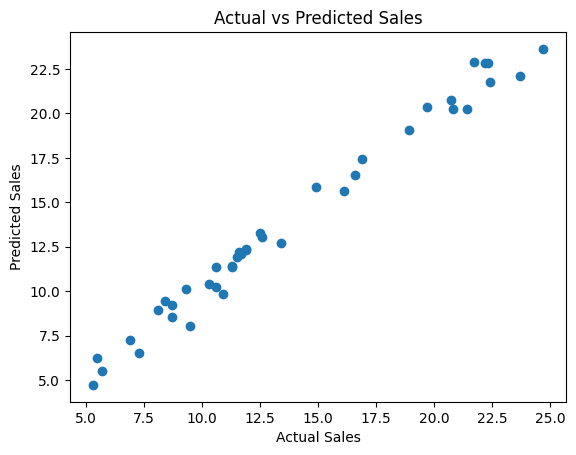

In [46]:
plt.scatter(y_test, gb_prediction)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

## Testing

In [48]:
# You can now use the trained model to predict sales for new data
new_data = pd.DataFrame({'TV': [200], 'radio': [50], 'newspaper': [10]})
predicted_sales = gb_model.predict(new_data)
print('Predicted Sales:', predicted_sales)

Predicted Sales: [21.86029502]
